In [1]:
##Parcial 3 - Ashley Durán

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install keras

In [4]:
#Aquí importamos los paquetes que necesitamos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [6]:
#Importamos la base con los datos históricos diarios de la TRM
TRM = "TRMdatos"
base_TRM = pd.read_csv(TRM, header=0, parse_dates=True, usecols= [0,2])
base_TRM.index = pd.to_datetime(base_TRM.VIGENCIADESDE, format="%d/%m/%Y")


#Establecemos una transformación de los datos diarios a datos mensuales
#e indicamos que se tome el último dato del mes como referencia
data_TRM = base_TRM.resample(rule = 'M').last()


#Necesitamos delimitar la base hasta el 2018
inicio = pd.to_datetime("1991-12-02").date()
final = pd.to_datetime("2018-12-31").date()
data2_TRM = data_TRM.loc[inicio:final]

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf

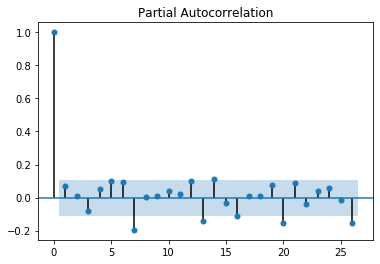

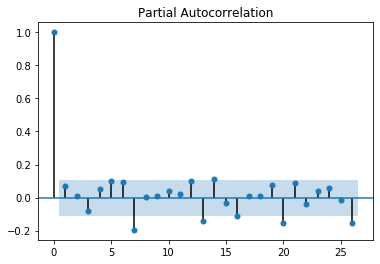

In [8]:
#Utilice la serie mensual con informacion hasta 2018 : 12 para identificar por lo
#menos dos modelos de Redes Neuronales para realizar pronósticos sobre la serie

sm.graphics.tsa.plot_pacf(data2_TRM["VALOR"].diff(1).dropna())

In [9]:
#Pronostique la tasa de cambio desde Enero a Septiembre de 2019 (mes a mes,
#rolling window).

def REDN (neuronas,reg):
    model = Sequential()
    model.add(RNN(neuronas, activation="relu",kernel_regularizer=l1(reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True, stateful=False))  
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [10]:
def DS (dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

inicial = datetime(1991,12,31)
final = pd.datetime(2018,12,31)
rollingw1 = []
scaler = MinMaxScaler(feature_range=(0, 1))
look_back = 1
for i in range(9): #Como el forecast lo vamos a hacer mes a mes, creamos un loop para que la predicción se repita 9 veces (enero a septiembre)
    inicio = inicial + pd.DateOffset(months=i)
    fin = final + pd.DateOffset(months=i)
    ventana = data_TRM.loc[inicio:fin,"VALOR"]
    dataset = ventana.values.reshape(-1,1)
    dataset = scaler.fit_transform(dataset)
    
    trainX, trainY = DS(dataset, look_back)  
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    
    model=REDN(50,look_back)
    model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
    predic = model.predict(trainX)[-1]
    predic = scaler.inverse_transform(predic.reshape(1,-1))
    rollingw1.append(predic[0][0])

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
inicial = datetime(1991,12,31)
final = pd.datetime(2018,12,31)
rollingw2 = []
scaler = MinMaxScaler(feature_range=(0, 1))
look_back = 3
for i in range(9): #Como el forecast lo vamos a hacer mes a mes, creamos un loop para que la predicción se repita 9 veces (enero a septiembre)
    inicio = inicial + pd.DateOffset(months=i)
    fin = final + pd.DateOffset(months=i)
    ventana = data_TRM.loc[inicio:fin,"VALOR"]
    dataset = ventana.values.reshape(-1,1)
    dataset = scaler.fit_transform(dataset)
    
    trainX, trainY = DS(dataset, look_back)  
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    
    model=REDN(50,look_back)
    model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
    predic = model.predict(trainX)[-1]
    predic = scaler.inverse_transform(predic.reshape(1,-1))
    rollingw2.append(predic[0][0])

In [ ]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [ ]:
#Considerando como Ho = Las predicciones tienen una precisión equivalente
actual = data_TRM.loc["2019-01-31":"2019-09-30","VALOR"]
rt = dm_test(actual,rollingw1,rollingw2,h = 1, crit="MSE")
print(rt)

In [ ]:
#Estimación ARIMA
rollingw_1=[]
for i in range(9):
    inicio = inicial + pd.DateOffset(months=i)
    fin = final + pd.DateOffset(months=i)
    ventana = data_TRM.loc[inicio:fin,"VALOR"]
    modelo = SARIMAX(ventana, order = (0,1,0))
    modelo_fit = modelo.fit()
    predic = modelo_fit.get_forecast(steps=1).predicted_mean
    rollingw_1.append(predic[0])

In [ ]:
#Estimación ARIMA
rollingw_2=[]
for i in range(9):
    inicio = inicial + pd.DateOffset(months=i)
    fin = final + pd.DateOffset(months=i)
    ventana2 = data_TRM.loc[inicio:fin,"VALOR"]
    modelo = SARIMAX(ventana2, order = (1,1,0))
    modelo_fit = modelo.fit()
    predic = modelo_fit.get_forecast(steps=1).predicted_mean
    rollingw_2.append(predic[0])

In [ ]:
MSER2 = np.sqrt(mean_squared_error(data_TRM.loc["2019-01":"2019-09","VALOR"],rollingw2))
MSER1 = np.sqrt(mean_squared_error(data_TRM.loc["2019-01":"2019-09","VALOR"],rollingw1))

MSE = np.sqrt(mean_squared_error(actual,rollingw_1))
MSE2 = np.sqrt(mean_squared_error(actual,rollingw_2))

print(MSER1)
print(MSER2)
print(MSE)
print(MSE2)